<a href="https://colab.research.google.com/github/bijoy-420/ML_Projects/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv', encoding='latin-1')

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2899,ham,Come aftr &lt;DECIMAL&gt; ..now i m cleaning ...,NaN,NaN,NaN
2947,ham,Nope but i'll b going 2 sch on fri quite early...,NaN,NaN,NaN
2347,ham,But i dint slept in afternoon.,NaN,NaN,NaN
4538,ham,"Party's at my place at usf, no charge (but if ...",NaN,NaN,NaN
4309,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#1. Data cleaning
#2.EDA
#3.Text Preprocessing
#4.Model Building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy


Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop column
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
df.sample(5)

,v1,v2
6,ham,Even my brother is not like to speak with me. ...
2179,ham,And popping &lt;#&gt; ibuprofens was no help.
3658,ham,Wait.i will come out.. &lt;#&gt; min:)
4112,ham,Thought we could go out for dinner. I'll treat...
4186,ham,Dear got bus directly to calicut


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
#Renaming
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [ ]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check missing value
df.isnull().sum()

,0
target,0
text,0


In [ ]:
#check duplicate value
df.duplicated().sum()

np.int64(403)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


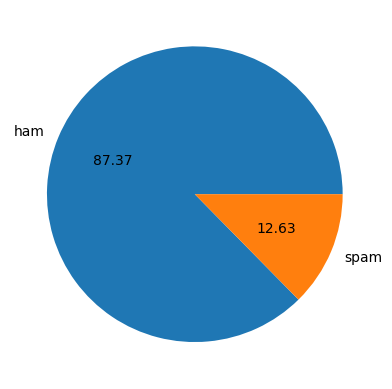

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
#Data is imbalance


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters']=df['text'].apply(len)


In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#number of word
df['Num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df.head(3)

,target,text,num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [ ]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(3)

,target,text,num_characters,Num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [ ]:
df[['num_characters','Num_words','num_sentence']].describe()

,num_characters,Num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#For ham messages
df[df['target']==0][['num_characters','Num_words','num_sentence']].describe()

,num_characters,Num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#For spam messages
df[df['target']==1][['num_characters','Num_words','num_sentence']].describe()

,num_characters,Num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
#histogram
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

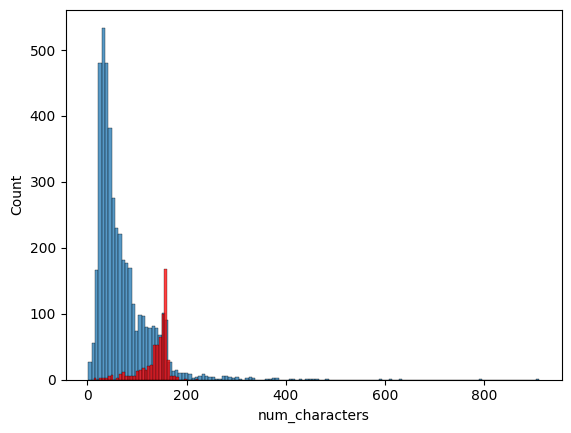

In [ ]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='Num_words', ylabel='Count'>

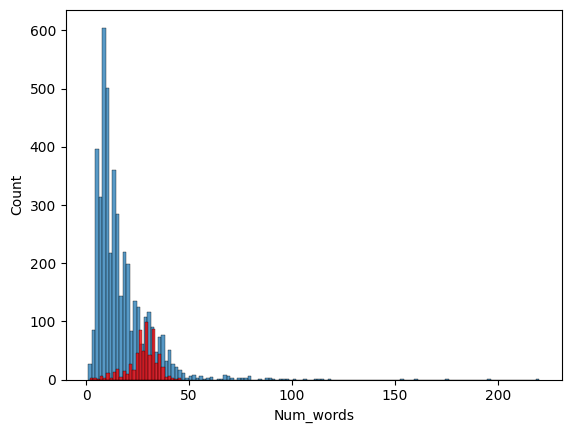

In [ ]:
sns.histplot(df[df['target']==0]['Num_words'])
sns.histplot(df[df['target']==1]['Num_words'],color='red')


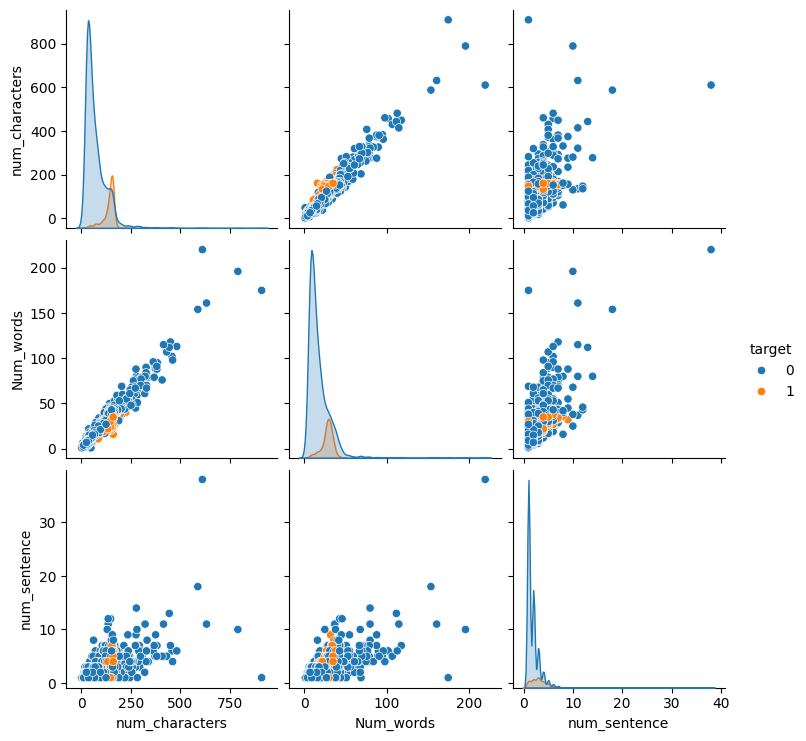

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

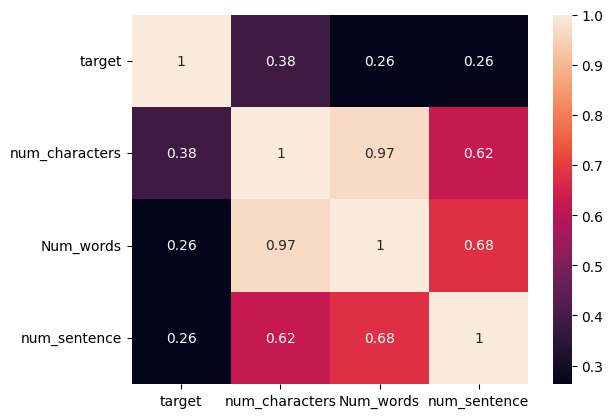

In [ ]:
sns.heatmap(df[['target', 'num_characters', 'Num_words', 'num_sentence']].corr(), annot=True)

Text Preprocessing
1.Lower case
2.Tokenization
3.Removing speacial caharacters
4.Removing stop words and punctuation
5.Stemming

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('danced')

'danc'

In [ ]:
transform_text('Hi My name is loving ???SABBIR 23%%&&*')

'hi name love sabbir 23'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('danced')

'danc'

In [ ]:
df['trnasformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head(5)

,target,text,num_characters,Num_words,num_sentence,trnasformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=250,height=250,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['trnasformed_text'].str.cat(sep=" " ))

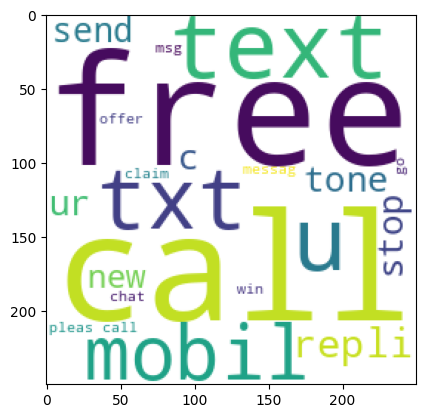

In [ ]:
plt.imshow(spam_wc)


In [ ]:
ham_wc=wc.generate(df[df['target']==0]['trnasformed_text'].str.cat(sep=" "))

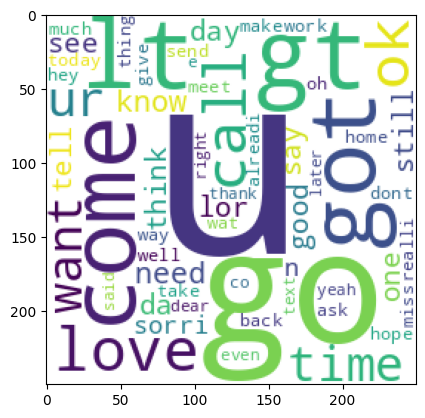

In [ ]:
plt.imshow(ham_wc)


In [ ]:
spam_corpus=[]
for meg in df[df['target']==1]['trnasformed_text'].tolist():
  for word in meg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
ham_corpus=[]
for meg in df[df['target']==0]['trnasformed_text'].tolist():
  for word in meg.split():
    ham_corpus.append(word)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


Model Building

In [ ]:
#text vectorization
#using bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['trnasformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb.fit(X_train,y_train)
predict1=gnb.predict(X_test)
print(accuracy_score(y_test,predict1))
print(confusion_matrix(y_test,predict1))
print(precision_score(y_test,predict1))


0.8626692456479691
[[771 118]
 [ 24 121]]
0.5062761506276151


In [ ]:
mnb.fit(X_train,y_train)
predict2=mnb.predict(X_test)
print(accuracy_score(y_test,predict2))
print(confusion_matrix(y_test,predict2))
print(precision_score(y_test,predict2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [ ]:
bnb.fit(X_train,y_train)
predict3=bnb.predict(X_test)
print(accuracy_score(y_test,predict3))
print(confusion_matrix(y_test,predict3))
print(precision_score(y_test,predict3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(penalty='l1', solver='liblinear')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9477611940298507)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)



SVC accuracy is 0.9758220502901354
SVC precision is 0.9477611940298507
KN accuracy is 0.90715667311412
KN precision is 1.0
NB accuracy is 0.9729206963249516
NB precision is 0.9915966386554622
DT accuracy is 0.9332688588007737
DT precision is 0.8275862068965517
LR accuracy is 0.9468085106382979
LR precision is 0.8629032258064516
RF accuracy is 0.971953578336557
RF precision is 0.9915254237288136
AdaBoost accuracy is 0.913926499032882
AdaBoost precision is 0.7916666666666666
BgC accuracy is 0.960348162475822
BgC precision is 0.8768115942028986
ETC accuracy is 0.9796905222437138
ETC precision is 1.0
GBDT accuracy is 0.9497098646034816
GBDT precision is 0.9514563106796117
xgb accuracy is 0.9680851063829787
xgb precision is 0.9375


In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
8,ETC,0.979691,1.000000
2,NB,0.972921,0.991597
5,RF,0.971954,0.991525
9,GBDT,0.949710,0.951456
0,SVC,0.975822,0.947761
10,xgb,0.968085,0.937500
7,BgC,0.960348,0.876812
4,LR,0.946809,0.862903
3,DT,0.933269,0.827586


In [ ]:
#model improving
#change the max_features parameters of Tfidf

import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))

pickle.dump(etc,open('model.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))

In [ ]:
from google.colab import files

In [ ]:

files.download("model.pkl")
files.download("vectorizer.pkl")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("model1.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>